In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.layers import Input
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import pickle


In [23]:
# Load your dataset (ensure the path is correct)
data = pd.read_csv('Dataset-ATS.csv')

# Display the first few rows to understand the structure of the dataset
print(data.head())

# Encode categorical variables using LabelEncoder
label_encoders = {}
categorical_columns = ['gender', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'Contract', 'Churn']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Define features (X) and target (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

# Handle class imbalance using SMOTE (Synthetic Minority Oversampling Technique)
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


   gender  SeniorCitizen Dependents  tenure PhoneService MultipleLines  \
0  Female              0         No       1           No            No   
1    Male              0         No      34          Yes            No   
2    Male              0         No       2          Yes            No   
3    Male              0         No      45           No            No   
4  Female              0         No       2          Yes            No   

  InternetService        Contract  MonthlyCharges Churn  
0             DSL  Month-to-month           29.85    No  
1             DSL        One year           56.95    No  
2             DSL  Month-to-month           53.85   Yes  
3             DSL        One year           42.30    No  
4     Fiber optic  Month-to-month           70.70   Yes  


In [24]:


# Build the ANN model
model = Sequential()

# Input Layer (using Input layer instead of input_dim)
model.add(Input(shape=(X_train.shape[1],)))  # This defines the input shape

# Hidden Layers
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Output Layer (binary classification: churn or not)
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 32)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 865 (3.38 KB)

 Trainable params: 865 (3.38 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Train the model on the training data
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.2)

# Save the trained model in the native Keras format
model.save('ann_model.keras')

# Save preprocessing objects (scaler and label encoders)
with open('preprocessing.pkl', 'wb') as f:
    pickle.dump({'scaler': scaler, 'encoders': label_encoders}, f)


Epoch 1/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6769 - loss: 0.6078 - val_accuracy: 0.7717 - val_loss: 0.4717
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7742 - loss: 0.4661 - val_accuracy: 0.7790 - val_loss: 0.4538
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7778 - loss: 0.4672 - val_accuracy: 0.7832 - val_loss: 0.4506
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7927 - loss: 0.4465 - val_accuracy: 0.7820 - val_loss: 0.4469
Epoch 5/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7801 - loss: 0.4605 - val_accuracy: 0.7856 - val_loss: 0.4455
Epoch 6/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7784 - loss: 0.4628 - val_accuracy: 0.7838 - val_loss: 0.4434
Epoch 7/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7792 - loss: 0.4647 - val_accuracy: 0.7880 - val_loss: 0.4435
Epoch 8/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7894 - loss: 0.4551 - val_accuracy: 0.

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
[[757 264]
 [141 908]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      1021
           1       0.77      0.87      0.82      1049

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070

AUC-ROC Score: 0.8719


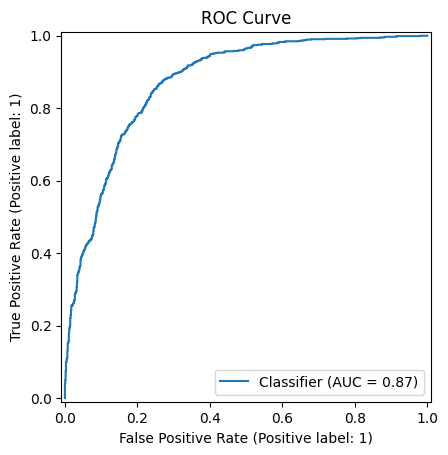

In [26]:
# Predict churn probabilities for the test data
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate AUC-ROC (Area Under Curve for Receiver Operating Characteristic)
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC Score: {auc_score:.4f}")

# Plot the ROC Curve
RocCurveDisplay.from_predictions(y_test, y_pred_prob)
plt.title('ROC Curve')
plt.show()


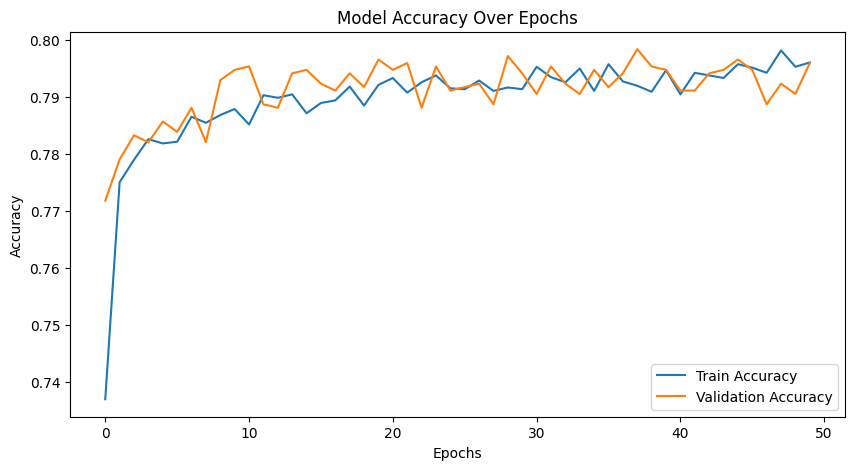

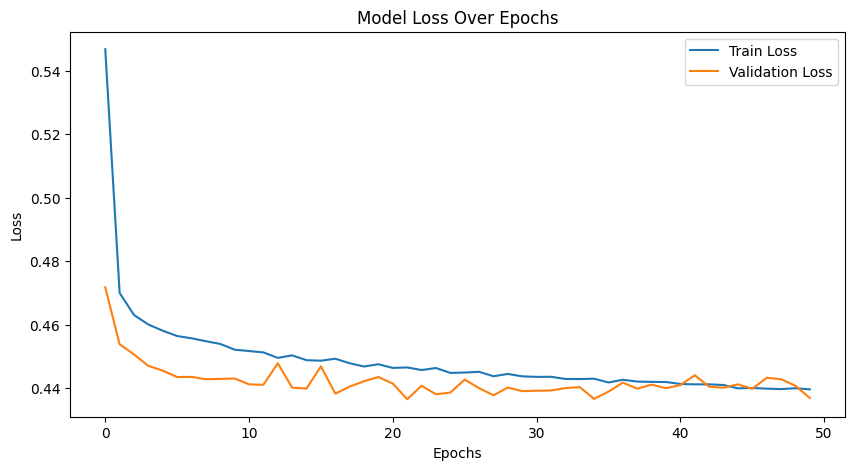

In [27]:
# Plot training and validation accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
